# Predictive Cardiology: Machine Learning Insights

In [ ]:
 # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


# Importing essential Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

# Loading CSV DataSet

In [ ]:
ds= pd.read_csv('../input/heart-disease-dataset/heart.csv')
ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
ds.shape

(1025, 14)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
ds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
ds.duplicated().any()

True

In [ ]:
ds.duplicated().sum()

723

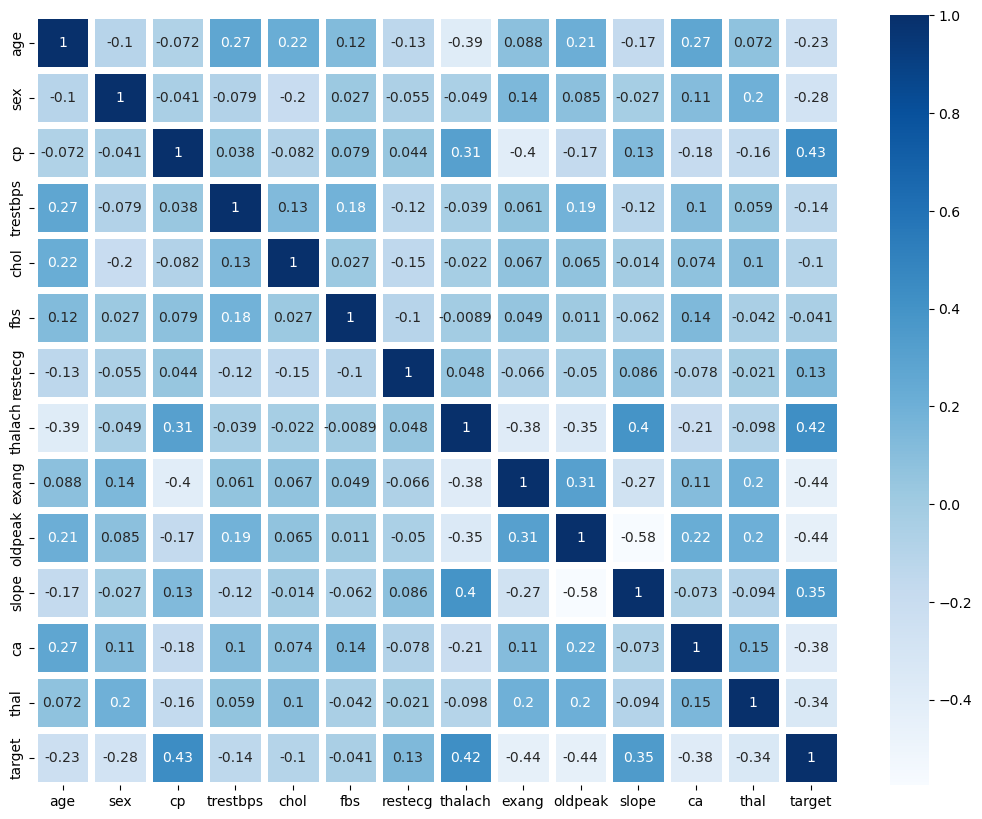

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(ds.corr(),annot=True, fmt='.2g',linewidths=5, cmap='Blues')
plt.show()

# Important Features

In [ ]:
y = ds['target']
x = ds.drop('target',axis = 1)

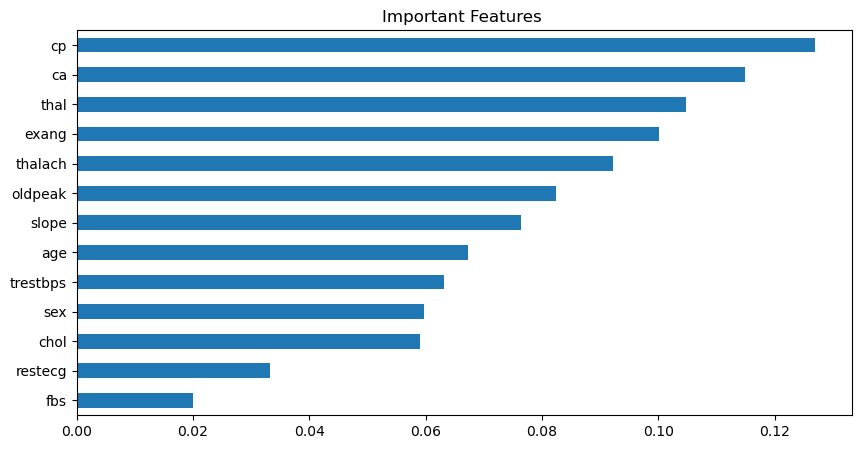

In [ ]:
model = ExtraTreesClassifier()
model.fit(x,y)
important_features = pd.Series(model.feature_importances_,index=x.columns)
plt.figure(figsize = (10,5))
important_features.nsmallest(30).plot(kind = 'barh')

plt.title('Important Features ',size = 12)
plt.show()

# Exploratory Data Analysis(EDA)

In [ ]:
ds['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

[Text(0, 0, '499'), Text(0, 0, '526')]

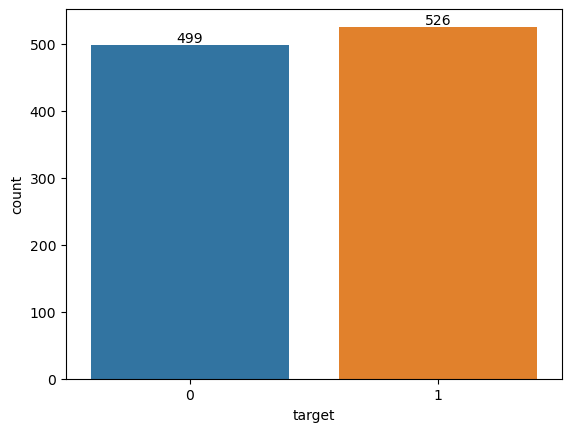

In [ ]:
ax = sns.countplot(x = 'target', data = ds)
ax.bar_label(ax.containers[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='target', ylabel='Density'>

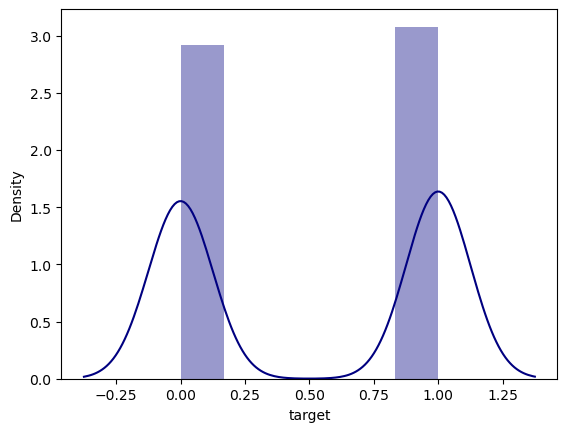

In [ ]:
sns.distplot(ds['target'],color = 'navy')

# Checking Outliners in Dataset

<AxesSubplot:>

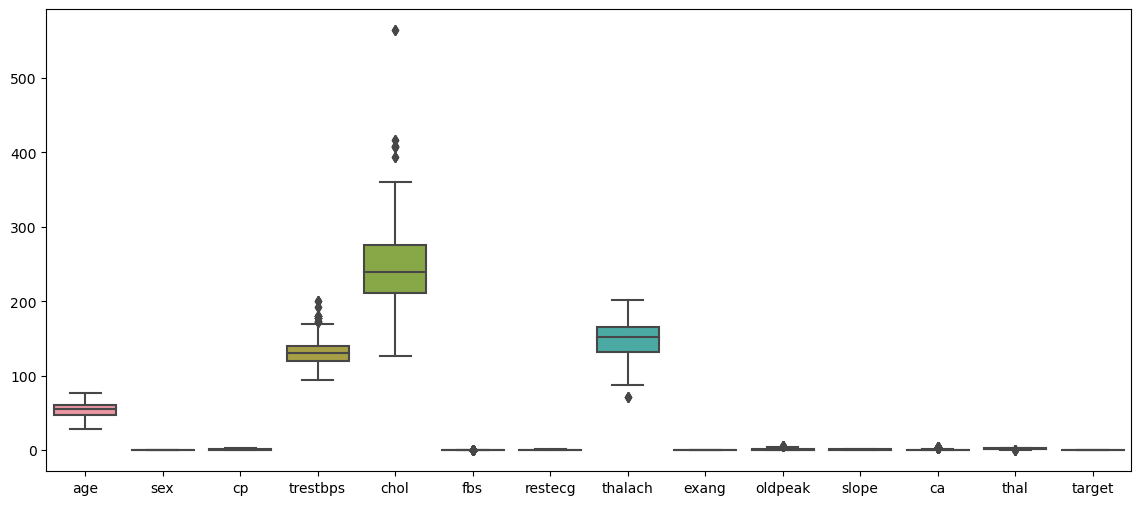

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data = ds)

# Outliners in chol

<AxesSubplot:>

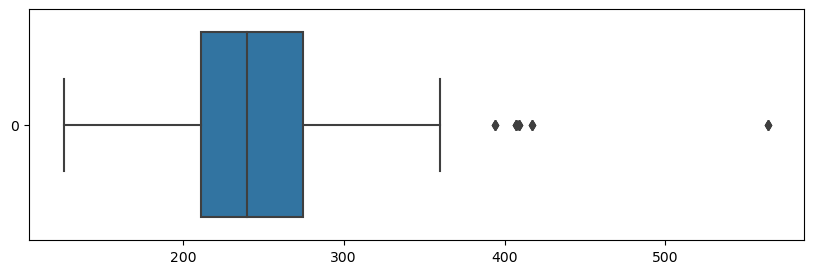

In [ ]:
plt.figure( figsize = (10,3))
sns.boxplot(ds['chol'],orient = 'h')

211.0
275.0
64.0
115.0 371.0


<AxesSubplot:>

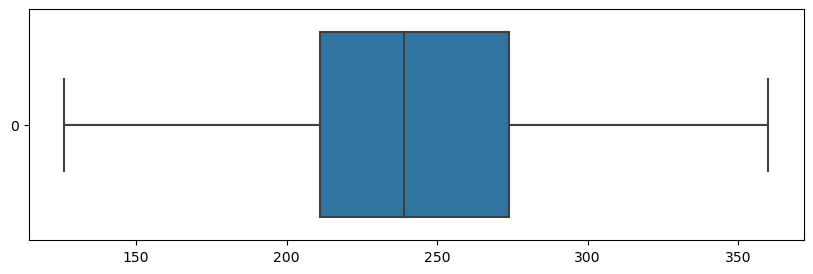

In [ ]:
q1 = ds['chol'].quantile(0.25)
print(q1)
q3 = ds['chol'].quantile(0.75)
IQR = q3 - q1
print(q3)
print(IQR)
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
print(lower_limit,upper_limit)
ds = ds[(ds['chol']>lower_limit) & (ds['chol']<upper_limit)]
ds.describe()
plt.figure(figsize = (10,3))
sns.boxplot(ds['chol'],orient = 'h')

# Outliners in trestbps

<AxesSubplot:>

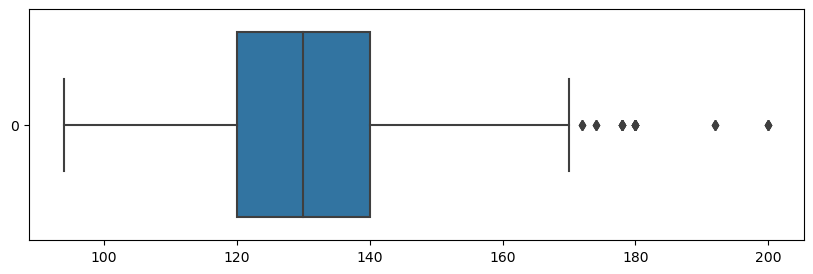

In [ ]:
plt.figure(figsize = (10,3))
sns.boxplot(ds['trestbps'],orient = 'h')

<AxesSubplot:>

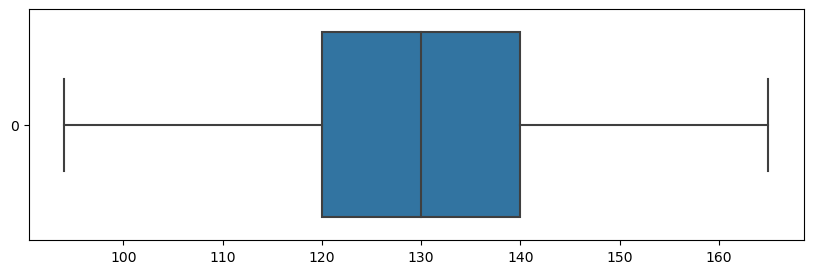

In [ ]:
q1 = ds['trestbps'].quantile(0.25)
q3 = ds['trestbps'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
ds = ds[(ds['trestbps'] > lower_limit) & (ds['trestbps'] < upper_limit)]
plt.figure(figsize=(10,3))
sns.boxplot(ds['trestbps'],orient = 'h')

# Outliners in thalach

<AxesSubplot:>

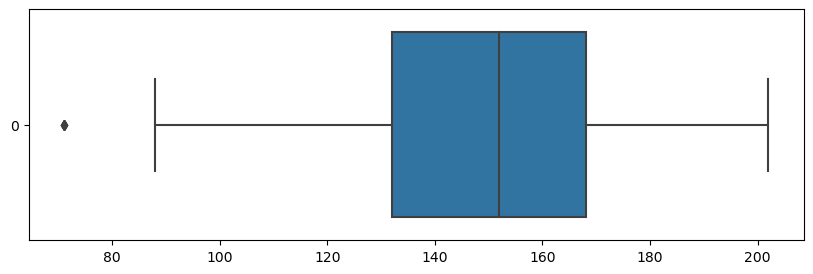

In [ ]:
plt.figure(figsize=(10,3))
sns.boxplot(ds['thalach'],orient = 'h')

<AxesSubplot:>

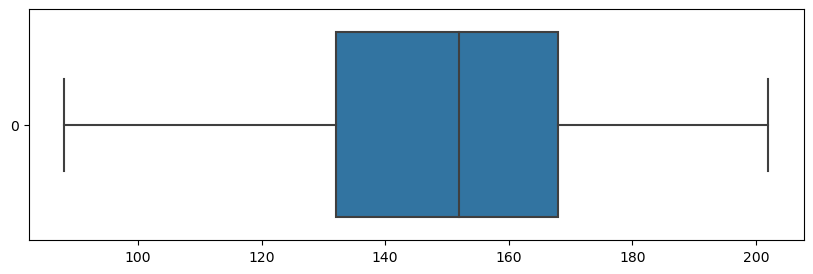

In [ ]:
q1 = ds['thalach'].quantile(0.25)
q3 = ds['thalach'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
ds = ds[(ds['thalach'] > lower_limit) & (ds['thalach'] < upper_limit)]
plt.figure(figsize=(10,3))
sns.boxplot(ds['thalach'],orient = 'h')

# Outliners in oldpeak

<AxesSubplot:>

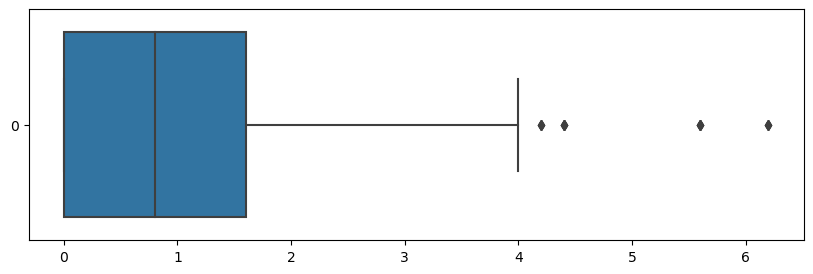

In [ ]:
plt.figure(figsize=(10,3))
sns.boxplot(ds['oldpeak'],orient = 'h')

<AxesSubplot:>

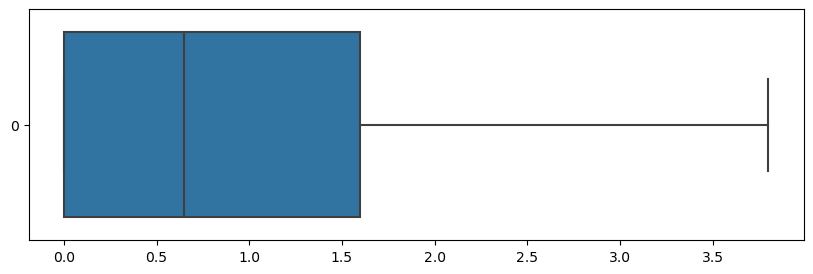

In [ ]:
q1 = ds['oldpeak'].quantile(0.25)
q3 = ds['oldpeak'].quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
ds = ds[(ds['oldpeak'] > lower_limit) & (ds['oldpeak'] < upper_limit)]
plt.figure(figsize=(10,3))
sns.boxplot(ds['oldpeak'],orient = 'h')

# Data Splitting

In [ ]:
y = ds['target']
x = ds.drop('target',axis = 1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((753, 13), (189, 13), (753,), (189,))

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train, x_test

(array([[ 0.86148431,  0.63627883,  0.05750755, ...,  0.9479379 ,
         -0.72736365, -0.51760467],
        [ 0.86148431, -1.57163803,  1.04167077, ..., -0.71981266,
          0.26127322,  1.11317491],
        [-0.65189139,  0.63627883,  0.05750755, ..., -2.38756323,
         -0.72736365,  1.11317491],
        ...,
        [ 1.07768083,  0.63627883,  1.04167077, ...,  0.9479379 ,
         -0.72736365, -0.51760467],
        [-1.62477577,  0.63627883,  1.04167077, ...,  0.9479379 ,
         -0.72736365, -0.51760467],
        [ 0.53718951,  0.63627883,  1.04167077, ..., -0.71981266,
          0.26127322, -2.14838426]]),
 array([[-0.3275966 ,  0.63627883,  1.04167077, ...,  0.9479379 ,
         -0.72736365, -0.51760467],
        [-1.08428445,  0.63627883,  1.04167077, ...,  0.9479379 ,
         -0.72736365, -0.51760467],
        [-0.00330181,  0.63627883, -0.92665568, ..., -0.71981266,
          0.26127322,  1.11317491],
        ...,
        [ 0.86148431, -1.57163803, -0.92665568, ..., -

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC().fit(x_train, y_train)

In [ ]:
svm_pred = svm.predict(x_test)
pd.DataFrame(np.c_[y_test,svm_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
184,1,1
185,0,0
186,0,0
187,1,0


Testing Accuracy : 91.53 %
Training Accuracy : 96.68 %


 Classification Report 
 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        83
           1       0.92      0.93      0.93       106

    accuracy                           0.92       189
   macro avg       0.92      0.91      0.91       189
weighted avg       0.92      0.92      0.92       189



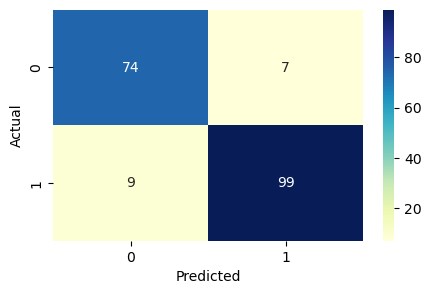

In [ ]:
svm_train = svm.score(x_train, y_train)*100
svm_test = svm.score(x_test, y_test)*100
print('Testing Accuracy :',round(svm_test,2),"%")
print('Training Accuracy :',round(svm_train,2),"%")
print('\n')
print(' Classification Report \n ')
print(classification_report(svm_pred, y_test))
plt.figure(figsize=(5,3))
data = confusion_matrix(y_test, svm_pred)
svm_con = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
sns.heatmap(svm_con, annot=True, fmt='g',cmap="YlGnBu")
f1 = metrics.f1_score(svm_pred, y_test)*100
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtc_pred = dtc.predict(x_test)
pd.DataFrame(np.c_[y_test,dtc_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
184,1,1
185,0,0
186,0,0
187,1,0


Testing Accuracy: 98.41 %
Training Accuracy: 100.0 %


 Classification Report 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        84
           1       0.97      1.00      0.99       105

    accuracy                           0.98       189
   macro avg       0.99      0.98      0.98       189
weighted avg       0.98      0.98      0.98       189



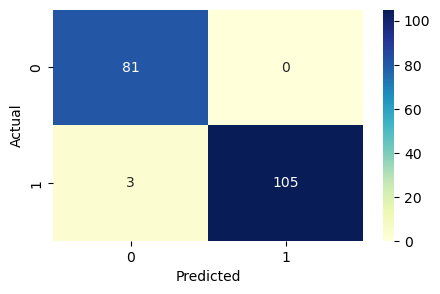

In [ ]:
dtc_train = dtc.score(x_train, y_train)*100
dtc_test = dtc.score(x_test, y_test)*100
print('Testing Accuracy:',round(dtc_test,2),"%")
print('Training Accuracy:',round(dtc_train,2),"%")
print('\n')
dtc_con = confusion_matrix(y_test,dtc_pred)
print(' Classification Report \n')
print(classification_report(dtc_pred, y_test))
plt.figure(figsize=(5,3))
data = confusion_matrix(y_test, dtc_pred)
dtc_con = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
sns.heatmap(dtc_con, annot=True, fmt='g',cmap="YlGnBu")
f1 = metrics.f1_score(dtc_pred, y_test)*100
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()